In [33]:
#TODO: create train & test sets

### Dataset Information
Data Set: FD001
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)

Data Set: FD002
Train trjectories: 260
Test trajectories: 259
Conditions: SIX 
Fault Modes: ONE (HPC Degradation)

Data Set: FD003
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: TWO (HPC Degradation, Fan Degradation)

Data Set: FD004
Train trjectories: 248
Test trajectories: 249
Conditions: SIX 
Fault Modes: TWO (HPC Degradation, Fan Degradation)



Experimental Scenario

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine ñ i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.

The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective of the competition is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to:
1)	unit number
2)	time, in cycles
3)	operational setting 1
4)	operational setting 2
5)	operational setting 3
6)	sensor measurement  1
7)	sensor measurement  2
...
26)	sensor measurement  26


Reference: A. Saxena, K. Goebel, D. Simon, and N. Eklund, ìDamage Propagation Modeling for Aircraft Engine Run-to-Failure Simulationî, in the Proceedings of the Ist International Conference on Prognostics and Health Management (PHM08), Denver CO, Oct 2008.


In [1]:
# Import needed libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os

In [5]:
#change this with the path to the dataset
dataset_path = "/Users/moji/dataset_repo/C-MAPSS" 

# Get the list of files and directories
files_and_dirs = os.listdir(dataset_path)

ds_list = []
# Print each item
for item in files_and_dirs:
    if item.endswith('.txt'):
        ds_list.append(item)
    # print(item)
print(f'we have {len(ds_list)} items in the dataset folder')

we have 13 items in the dataset folder


In [25]:
ds_list[4]

'RUL_FD001.txt'

In [8]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [20]:
train_path = os.path.join(dataset_path,ds_list[0])
dftrain = pd.read_csv(train_path,sep='\s+',header=None,index_col=False,names=col_names)

test_path = os.path.join(dataset_path,ds_list[10])
dftest = pd.read_csv(test_path,sep='\s+',header=None,index_col=False,names=col_names)

y_test_path = os.path.join(dataset_path,ds_list[4])
y_test = pd.read_csv(y_test_path,sep='\s+',header=None,index_col=False,names=['RUL'])

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/var/folders/0s/whfbkk11083fmvg1wl2nrqqm0000gn/T/ipykernel_62264/2238268802.py:2: SyntaxWarning: invalid escape sequence '\s'
  dftrain = pd.read_csv(train_path,sep='\s+',header=None,index_col=False,names=col_names)
/var/folders/0s/whfbkk11083fmvg1wl2nrqqm0000gn/T/ipykernel_62264/2238268802.py:5: SyntaxWarning: invalid escape sequence '\s'
  dftest = pd.read_csv(test_path,sep='\s+',header=None,index_col=False,names=col_names)
/var/folders/0s/whfbkk11083fmvg1wl2nrqqm0000gn/T/ipykernel_62264/2238268802.py:8: SyntaxWarning: invalid escape sequence '\s'
  y_test = pd.read_csv(y_test_path,sep='\s+',header=None,index_col=False,names=['RUL'])


In [32]:
dftrain.shape, dftest.shape, y_test.shape

((20631, 26), (13096, 26), (100, 1))

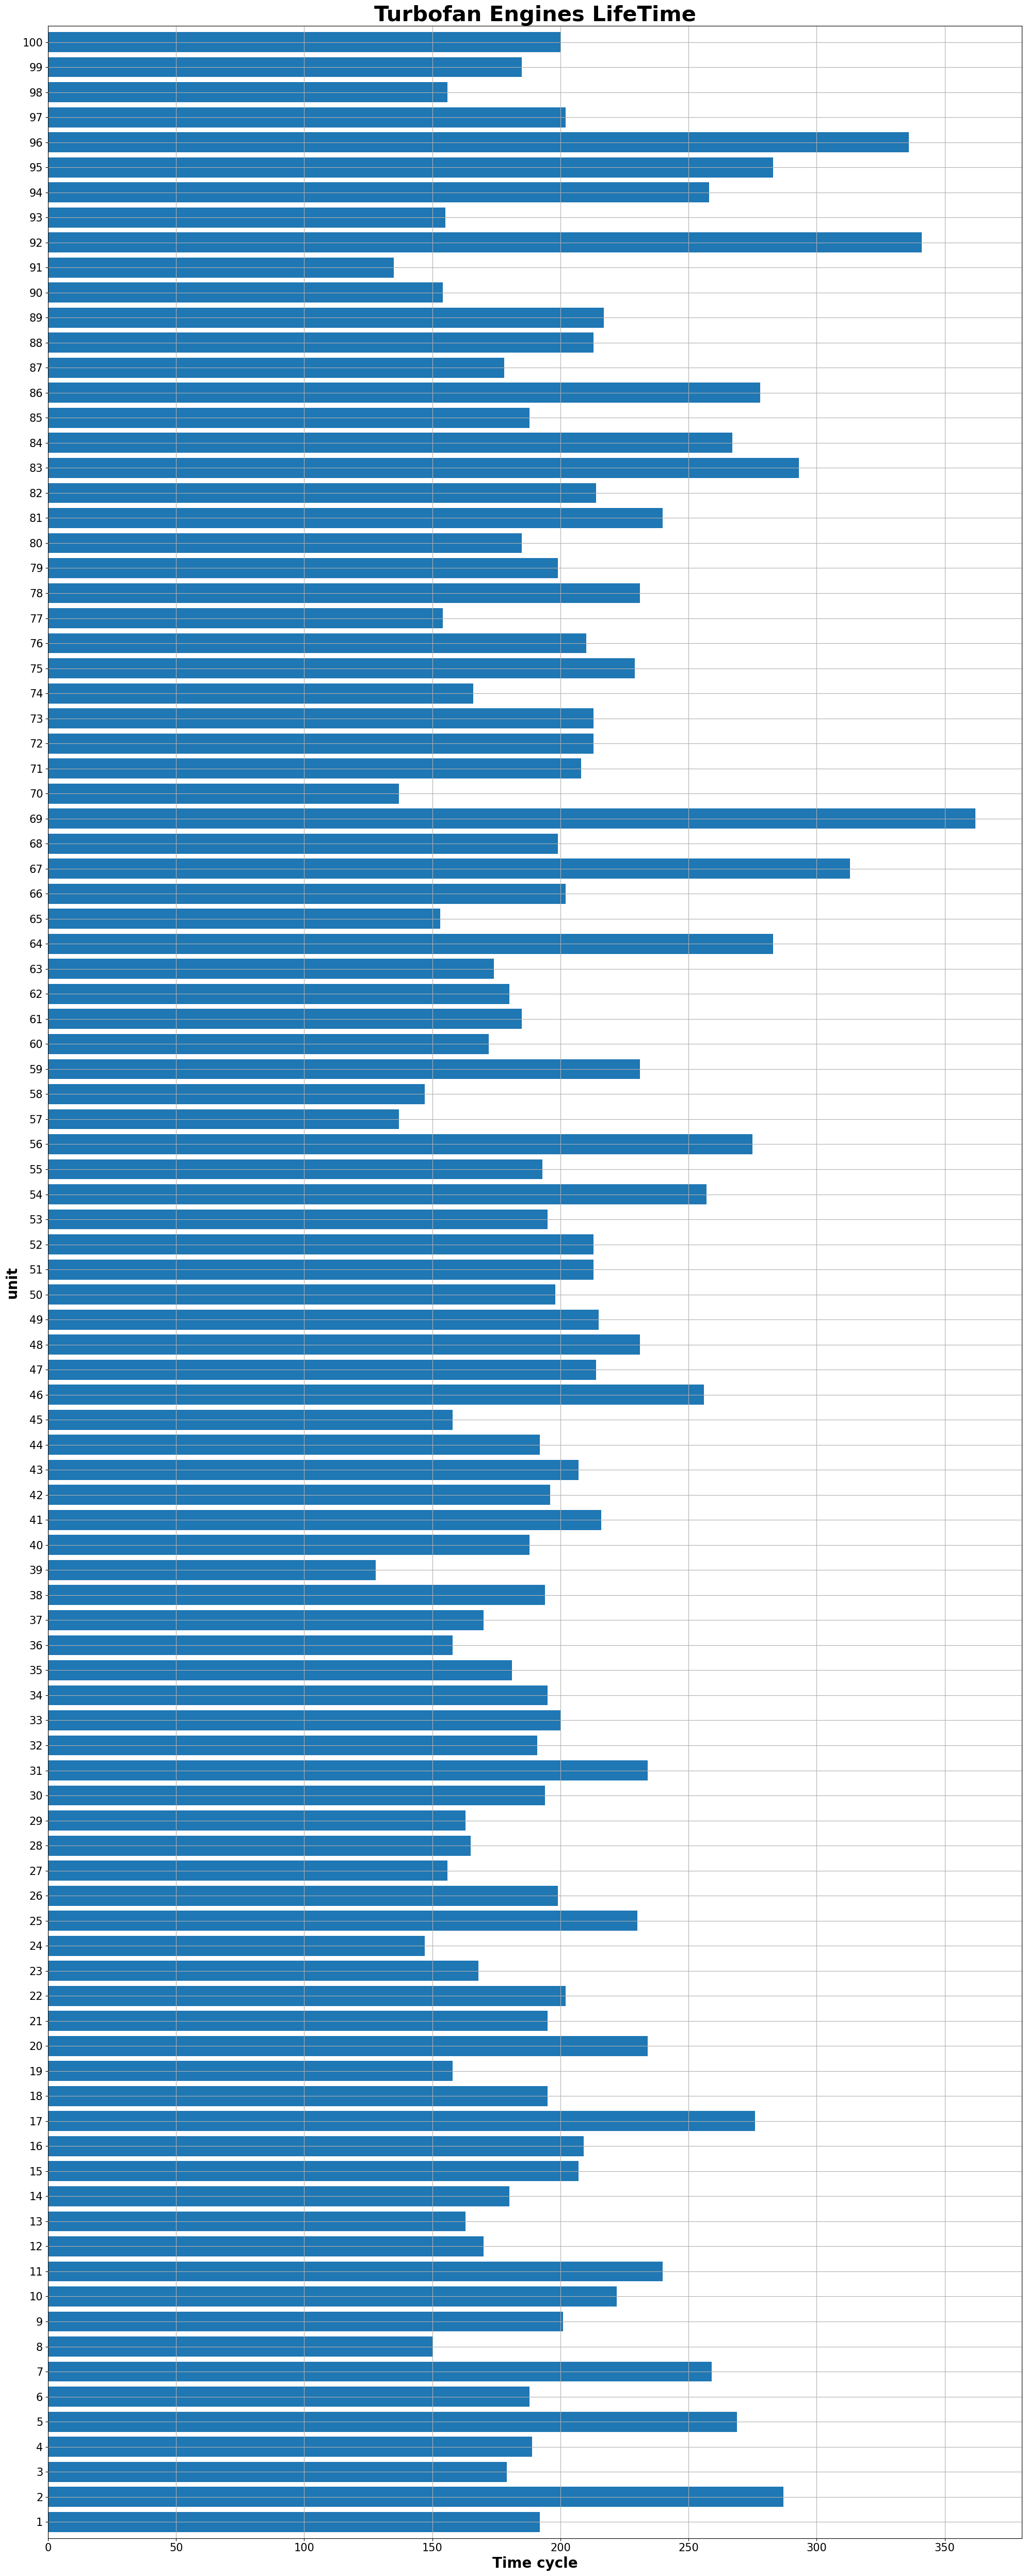

In [27]:
max_time_cycles=dftrain[index_names].groupby('unit_number').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
#Add RUL column to the data
def add_RUL_column(df):
    train_grouped_by_unit = df.groupby(by='unit_number') 
    max_time_cycles = train_grouped_by_unit['time_cycles'].max() 
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1) 
    return merged

In [31]:
new_train =  add_RUL_column(dftrain)
new_train

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1
